In [34]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
engagement = pd.read_csv("user_engagement.csv", encoding = "ISO-8859-1")
users = pd.read_csv("users.csv", encoding = "ISO-8859-1")

In [36]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [37]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [38]:
merged = users.merge(engagement, left_on="object_id", right_on="user_id")
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1


In [39]:
merged.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited
count,207917.000000,2.079170e+05,207917.000000,207917.000000,207917.000000,116887.000000,207917.000000,207917.0
mean,5913.314197,1.399439e+09,0.258137,0.154533,164.315895,5972.167555,5913.314197,1.0
std,3394.941674,8.294017e+06,0.437611,0.361460,121.165846,3247.095621,3394.941674,0.0
min,1.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,1.000000,1.0
25%,3087.000000,1.401045e+09,0.000000,0.000000,60.000000,3269.000000,3087.000000,1.0
50%,5682.000000,1.401665e+09,0.000000,0.000000,145.000000,5972.000000,5682.000000,1.0
75%,8944.000000,1.401868e+09,1.000000,0.000000,260.000000,8513.000000,8944.000000,1.0
max,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,12000.000000,1.0


In [40]:
# Checking for missing values in table
merged.isna().any()
# There are missing values in the invited_by_user_id column

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time    False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
email_domain                  False
time_stamp                    False
user_id                       False
visited                       False
dtype: bool

In [41]:
# Pull the date and time from the timestamp into its own columns
time_split = merged['time_stamp'].str.split(' ', expand=True)
merged['date_visited'] = time_split[0]
merged['time_visited'] = time_split[1]
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,03:45:04
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,03:45:04
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,03:45:04
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,03:45:04


In [42]:
def convert_time_to_decimal(col):
    """ Convert time from HH:MM:SS to just in terms of hours"""
    splitted = col.str.split(":", expand=True)
    hour_col = splitted[0].astype(int)
    min_col = splitted[1].astype(int)
    sec_col = splitted[2].astype(int)
    decimal_col = min_col / 60 + sec_col / 3600     # Proportion of an hour based on minutes and seconds
    return hour_col + decimal_col
    
merged['time_visited'] = convert_time_to_decimal(merged['time_visited'])
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,3.891667
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,3.751111
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,3.751111
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,3.751111
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,3.751111


In [43]:
from datetime import datetime

def days_between(date1, date2):
    """ Computes the difference in days between two dates """
    date1 = datetime.strptime(date1, "%Y-%m-%d")
    date2 = datetime.strptime(date2, "%Y-%m-%d")
    return abs(date2 - date1).days

days_between("2014-04-22", "2013-11-15")

158

In [44]:
def find_days_diff(df):
    """ Returns list for all users of the number of days between logins """
    num_days_diff = []
    for user_id in set(df["user_id"]):
        user_frame = df[df['user_id'] == user_id]                 # Restrict dataframe to entries of one user at a time
        date_visted = user_frame['date_visited']
        date_diff = [date_visted.iloc[0]] + list(date_visted)     # Add padding to the front of array
        num_diff = []
        for i in range(1, len(date_diff)):
            between = days_between(date_diff[i-1], date_diff[i])  # For each visit, compute the days since the last visit
            num_diff.append(between)
        num_days_diff.extend(num_diff)
    return num_days_diff
        
merged['days_diff'] = find_days_diff(merged)
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited,days_diff
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,3.891667,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,3.751111,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,3.751111,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,3.751111,10
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,3.751111,16


In [45]:
def find_adopted(df):
    """ Returns 1 if user is considered adopted and 0 if not """
    """ User is considered adopted if they login at least 3 times in any 7 day period """
    if sum(df['visited']) < 3:     # User who has visited the product less than 3 times can never be considered adopted
        return 0
    sum_last_three = sum(df['days_diff'].iloc[0:3])   # Keeps track of the number of days between a period of 3 visits 
    for i in range(3, len(df['days_diff'])):
        last_diff = df['days_diff'].iloc[i-3]
        next_diff = df['days_diff'].iloc[i]
        sum_last_three = sum_last_three - last_diff + next_diff
        if sum_last_three <= 7:                       # If the number of days between a period of 3 visits is less than or equal to 7, then considered adopted
            return 1
    return 0

adopted = merged[['user_id', 'visited', 'days_diff']].groupby('user_id').apply(find_adopted)
adopted.head()

user_id
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [46]:
# Add boolean list of adopted users into the table
adopted = adopted.reset_index().rename(columns={0: "adopted"})
merged = merged.merge(adopted, on='user_id')
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited,days_diff,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,3.891667,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,3.751111,0,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,3.751111,14,0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,3.751111,10,0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,3.751111,16,0


In [47]:
# Number of users that are non-adopted vs adopted
adopted['adopted'].value_counts()

0    7484
1    1339
Name: adopted, dtype: int64

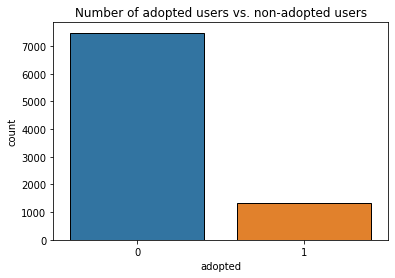

In [48]:
plt.title("Number of adopted users vs. non-adopted users")
sns.countplot(x='adopted', data=adopted);
# Number of adopted users is significantly less than number of non-adopted users

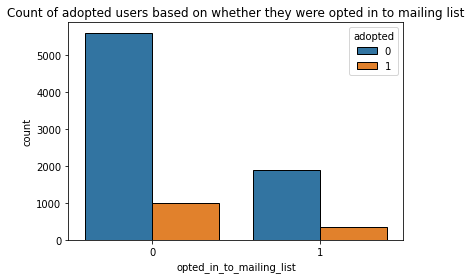

In [49]:
mailing_list_frame = merged[['user_id', 'opted_in_to_mailing_list', 'adopted']]
mailing_list_frame = mailing_list_frame.groupby('user_id').max('opted_in_to_mailing_list')
sns.countplot(x='opted_in_to_mailing_list', data=mailing_list_frame, hue='adopted')
plt.title("Count of adopted users based on whether they were opted in to mailing list");
# Whether a user was opted into the mailing list does not seem to have a significant effect on whether they are adopted users

In [50]:
not_in_mailing_list = mailing_list_frame[mailing_list_frame['opted_in_to_mailing_list'] == 0]
prop_adopted_no_mailing = len(not_in_mailing_list[not_in_mailing_list['adopted'] == 1]) / len(not_in_mailing_list)
print("Proportion of adopted users among users who opted in to mailing list:", prop_adopted_no_mailing)

in_mailing_list = mailing_list_frame[mailing_list_frame['opted_in_to_mailing_list'] == 1]
prop_adopted_mailing = len(in_mailing_list[in_mailing_list['adopted'] == 1]) / len(in_mailing_list)
print("Proportion of adopted users among users who opted in to mailing list:", prop_adopted_mailing)

# No significant difference of proportion of adopted users among users who opted in to mailing list and adopted users who did not opt in to mailing list

Proportion of adopted users among users who opted in to mailing list: 0.15052296498408368
Proportion of adopted users among users who opted in to mailing list: 0.1554357592093441


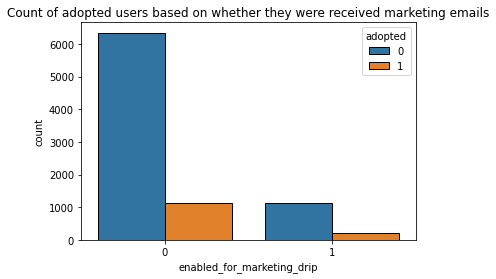

In [51]:
marketing_frame = merged[['user_id', 'enabled_for_marketing_drip', 'adopted']]
marketing_frame = marketing_frame.groupby('user_id').max('enabled_for_marketing_drip')
sns.countplot(x='enabled_for_marketing_drip', data=marketing_frame, hue='adopted')
plt.title("Count of adopted users based on whether they were received marketing emails");
# Whether a user was on the regular marketing email drip does not seem to have a significant effect on whether they are adopted users

In [52]:
# Replacing missing values in invited_by_user_id column with -1
merged["invited_by_user_id"] = merged["invited_by_user_id"].fillna(-1)
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited,days_diff,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,3.891667,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,3.751111,0,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,3.751111,14,0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,3.751111,10,0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,3.751111,16,0


In [53]:
# Add column of boolean value of whether user was invited by another user
merged["invited_by_user"] = merged["invited_by_user_id"] != -1
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,time_stamp,user_id,visited,date_visited,time_visited,days_diff,adopted,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,2014-04-22 03:53:30,1,1,2014-04-22,3.891667,0,0,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-15 03:45:04,2,1,2013-11-15,3.751111,0,0,True
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-11-29 03:45:04,2,1,2013-11-29,3.751111,14,0,True
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-09 03:45:04,2,1,2013-12-09,3.751111,10,0,True
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,2013-12-25 03:45:04,2,1,2013-12-25,3.751111,16,0,True


In [54]:
merged['email_domain'].value_counts().head(10)

gmail.com         71310
yahoo.com         31411
hotmail.com       25434
jourrapide.com    23274
gustr.com         19509
cuvox.de          16503
qqgix.com           590
nrwjd.com           521
fkhiq.com           470
fsdmy.com           449
Name: email_domain, dtype: int64

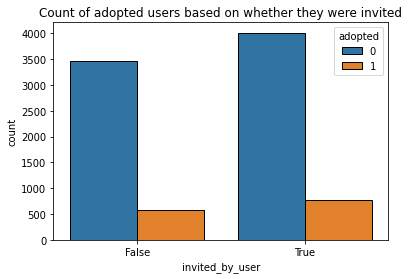

In [55]:
invite_frame = merged[['user_id', 'invited_by_user', 'adopted']]
invite_frame = invite_frame.groupby('user_id').max('invited_by_user')
sns.countplot(x='invited_by_user', data=invite_frame, hue='adopted')
plt.title("Count of adopted users based on whether they were invited");
# Whether a user was invited by a user does not seem to have a significant effect on whether they are adopted users

In [56]:
org_frame = merged[['user_id', 'org_id', 'adopted']]
org_frame = org_frame.groupby(['org_id', 'user_id']).max('adopted')
org_frame['num_users'] = org_frame['adopted']
org_frame = org_frame.groupby('org_id').agg({'adopted': sum, 'num_users': lambda x: len(x)})
org_frame = org_frame.rename(columns={'adopted': 'num_adopted'}).sort_values('num_adopted', ascending=False)
org_frame.head(10)
# Number of adopted users seems to slightly depend on what organization they part of  

,num_adopted,num_users
org_id,,
7,16,88
3,14,125
2,13,150
1,13,172
9,12,91
13,12,50
0,11,228
4,11,122
5,10,87


In [57]:
# Add ratio of number of adopted users and the total number of users in each organization
org_frame['num_adopted/num_users'] = org_frame['num_adopted'] / org_frame['num_users']
org_frame.sort_values('num_users', ascending=False).head(10)

,num_adopted,num_users,num_adopted/num_users
org_id,,,
0,11,228,0.048246
1,13,172,0.075581
2,13,150,0.086667
3,14,125,0.112000
4,11,122,0.090164
6,8,102,0.078431
9,12,91,0.131868
7,16,88,0.181818
5,10,87,0.114943


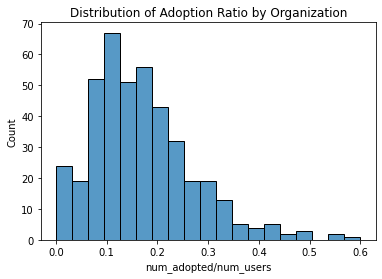

In [58]:
plt.title("Distribution of Adoption Ratio by Organization")
sns.histplot(x='num_adopted/num_users', data=org_frame);
# Most organizations have an adoption ratio between 0.05 and 0.25

In [59]:
# Creating table of total number of visits for each user
visited_frame = merged[['user_id', 'visited', 'adopted']]
visited_frame = visited_frame.groupby('user_id').agg({'visited': sum, 'adopted': max})
visited_frame = visited_frame.sort_values('visited', ascending=False)
visited_frame.head(10)

,visited,adopted
user_id,,
3623,606,1
906,600,1
1811,593,1
7590,590,1
8068,585,1
9402,581,1
4022,580,1
3269,566,1
9312,547,1


Average number of visits among adopted users: 145.66616878267365
Average number of visits among non-adopted users: 1.719668626402993


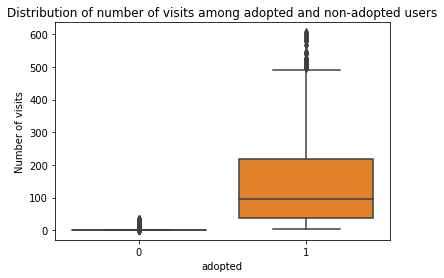

In [60]:
print("Average number of visits among adopted users:", np.average(visited_frame[visited_frame['adopted'] == 1]['visited']))
print("Average number of visits among non-adopted users:", np.average(visited_frame[visited_frame['adopted'] == 0]['visited']))
sns.boxplot(x='adopted', data=visited_frame, y='visited')
plt.title("Distribution of number of visits among adopted and non-adopted users")
plt.ylabel("Number of visits");
# Adopted users tend to have a significantly higher number of total visits than non-adopted users

In [61]:
# Creating table of number of adopted users based on each creation source
creation_frame = merged[['user_id', 'creation_source', 'adopted']]
creation_frame = creation_frame.groupby(['creation_source', 'user_id']).max('adopted')
creation_frame['num_users'] = creation_frame['adopted']
creation_frame = creation_frame.groupby('creation_source').agg({'adopted': sum, 'num_users': lambda x: len(x)})
creation_frame['num_adopted/num_users'] = creation_frame['adopted'] / creation_frame['num_users'] 
creation_frame

,adopted,num_users,num_adopted/num_users
creation_source,,,
GUEST_INVITE,303,1588,0.190806
ORG_INVITE,462,3188,0.144918
PERSONAL_PROJECTS,134,764,0.175393
SIGNUP,253,1898,0.133298
SIGNUP_GOOGLE_AUTH,187,1385,0.135018


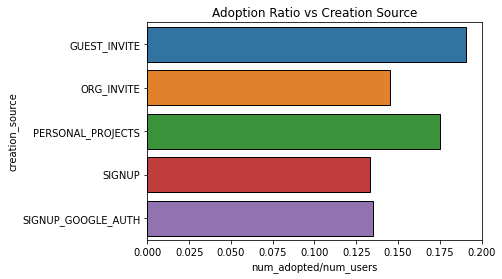

In [62]:
sns.barplot(y=creation_frame.index, x='num_adopted/num_users', data=creation_frame, orient="h")
plt.title("Adoption Ratio vs Creation Source");
# Users who use a guess invite seem to have a slightly higher proportion of them who are adopted users

In [63]:
# Creating frame of number of adopted users based on each email domain
email_frame = merged[['user_id', 'email_domain', 'adopted']]
email_frame = email_frame.groupby(['email_domain', 'user_id']).max('adopted')
email_frame['num_users'] = email_frame['adopted']
email_frame = email_frame.groupby('email_domain').agg({'adopted': sum, 'num_users': lambda x: len(x)})
email_frame = email_frame.rename(columns={'adopted': 'num_adopted'})
email_frame['num_adopted/num_users'] = email_frame['num_adopted'] / email_frame['num_users'] 
email_frame = email_frame[email_frame['num_users'] > 5].sort_values('num_adopted/num_users', ascending=False)
email_frame

,num_adopted,num_users,num_adopted/num_users
email_domain,,,
hotmail.com,167,803,0.207970
jourrapide.com,138,883,0.156285
gmail.com,443,2930,0.151195
gustr.com,121,842,0.143705
cuvox.de,114,828,0.137681
yahoo.com,219,1726,0.126883


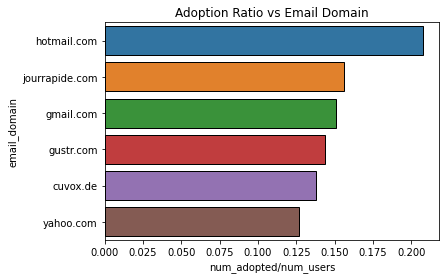

In [64]:
sns.barplot(y=email_frame.index, x='num_adopted/num_users', data=email_frame, orient="h")
plt.title("Adoption Ratio vs Email Domain");
# Users with the hotmail.com email domain have a slightly higher proportion of adopted users

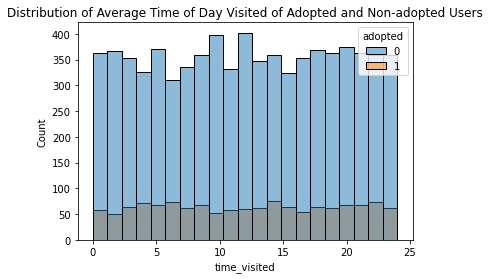

In [65]:
time_frame = merged[['user_id', 'adopted', 'time_visited']].groupby('user_id').agg(np.average)
sns.histplot(x="time_visited", data=time_frame, hue='adopted')
plt.title("Distribution of Average Time of Day Visited of Adopted and Non-adopted Users");
# No significant difference in distribution of average time of day visited between adopted and non-adopted users 

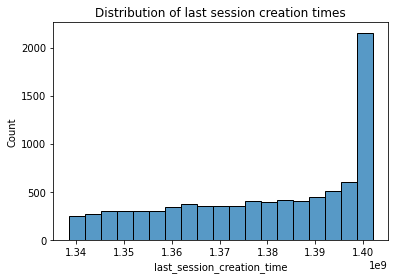

In [66]:
sns.histplot(data=merged.groupby("user_id").max("last_session_creation_time")["last_session_creation_time"])
plt.title("Distribution of last session creation times");
# Most users have not visited the product recently